In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import logging
import os

def get_color(
    iteration_count, 
    max_iter=1000
    ):
    if iteration_count == max_iter:
        return (0, 0, 0)
    percentage = (iteration_count * 100) // max_iter
    if percentage < 33:
        return (percentage * 7, 0, 255)
    elif percentage < 66:
        return (255, 0, 255 - ((percentage - 33) * 7))
    else:
        return (255, (percentage - 66) * 7, 0)

def generate_mandelbrot_image(
    width, 
    height, 
    max_iter=100
    ):
    image = np.zeros((height, width, 3), dtype=np.uint8)
    mandelbrot_sum = 0
    for y in range(height):
        for x in range(width):
            x0 = (x / width) * 3.5 - 2.5
            y0 = (y / height) * 2.0 - 1.0
            xi = yi = iteration = 0
            while iteration < max_iter and (xi*xi + yi*yi) <= 4:
                tmp = xi*xi - yi*yi + x0
                yi = 2*xi*yi + y0
                xi = tmp
                iteration += 1
            mandelbrot_sum += iteration
            image[y, x] = get_color(iteration, max_iter)
    return mandelbrot_sum, image

def format_table(
    rows, 
    headers
    ):
    # Find max width for each column
    cols = list(zip(*([headers] + rows)))
    col_widths = [max(len(str(item)) for item in col) for col in cols]
    fmt = ' | '.join('{{:{}}}'.format(w) for w in col_widths)
    sep = '-+-'.join('-' * w for w in col_widths)
    table = [fmt.format(*headers), sep]
    for row in rows:
        table.append(fmt.format(*row))
    return '\n'.join(table)

def main():
    os.makedirs("Mandelbrot_results", exist_ok=True)
    filepath = "Mandelbrot_results/"

    # Configure logging
    logging.basicConfig(
        filename=f"{filepath}mandelbrot.log",
        encoding="utf-8",
        filemode="w",
        format="{asctime} - {levelname} - {message}",
        style="{",
        datefmt="%Y-%m-%d %H:%M",
        level=logging.INFO
    )
    
    # Get logger instance
    logger = logging.getLogger(__name__)
    
    image_resolutions = [
        [128, 128],
        [160, 160],
        [192, 192],
        [224, 224],
        [256, 256]
    ]

    logger.info("Mandelbrot Performance Benchmarking")
    
    results = []
    for i in range(len(image_resolutions)):
        width = image_resolutions[i][0]
        height = image_resolutions[i][1]
        start = time.time()
        total, image = generate_mandelbrot_image(width, height)
        elapsed = time.time() - start
        img_file = f"mandelbrot_{width}×{height}.png"
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f"{filepath}{img_file}", bbox_inches='tight', pad_inches=0)
        plt.close()
        results.append([
            f"{width}x{height}",
            f"{elapsed:.3f} s",
            str(total),
            img_file
        ])
    # Table headers
    headers = ["Resolution", "Time", "Checksum", "Image File"]
    table = format_table(results, headers)
    print("\nMandelbrot Benchmark Results:")
    print(table)
    logger.info("\n" + table)
    logger.info("Mandelbrot benchmarking completed")

if __name__ == "__main__":
    main()



Mandelbrot Benchmark Results:
Resolution | Time    | Checksum | Image File            
-----------+---------+----------+-----------------------
128x128    | 0.087 s | 429384   | mandelbrot_128×128.png
160x160    | 0.142 s | 669829   | mandelbrot_160×160.png
192x192    | 0.198 s | 966024   | mandelbrot_192×192.png
224x224    | 0.283 s | 1314999  | mandelbrot_224×224.png
256x256    | 0.359 s | 1715812  | mandelbrot_256×256.png


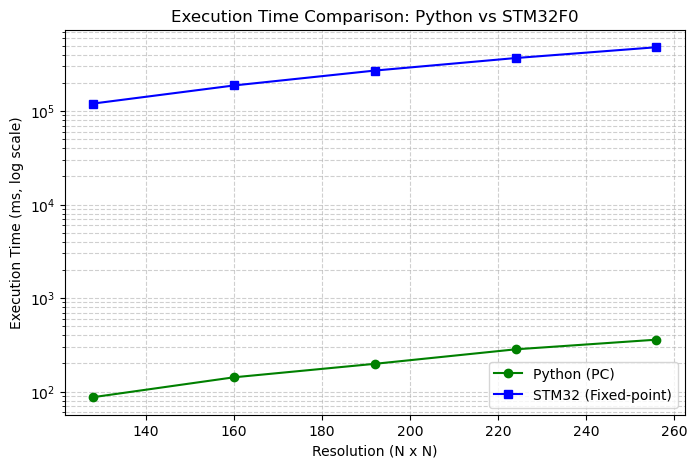

In [3]:
import matplotlib.pyplot as plt

# Python results (times in seconds, converted to ms for consistency)
py_times_ms = [87, 142, 198, 283, 359]

# STM32 results (already in ms, fixed-point)
stm32_times_ms = [120233, 187812, 271123, 369171, 481974]

# Resolutions
resolutions = [128, 160, 192, 224, 256]

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(resolutions, py_times_ms, marker='o', label="Python (PC)", color="green")
plt.plot(resolutions, stm32_times_ms, marker='s', label="STM32 (Fixed-point)", color="blue")

# Scale y-axis to log to show both
plt.yscale("log")

# Labels
plt.xlabel("Resolution (N x N)")
plt.ylabel("Execution Time (ms, log scale)")
plt.title("Execution Time Comparison: Python vs STM32F0")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()

# Save figure
plt.savefig("python_vs_stm32_times.png", dpi=300, bbox_inches="tight")
plt.show()